In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


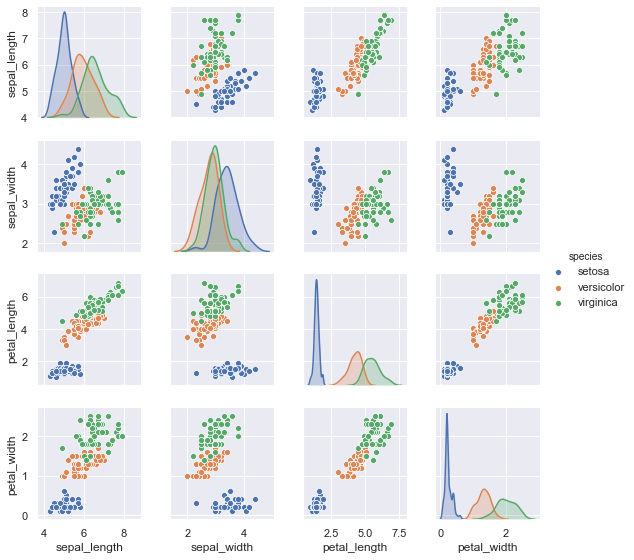

In [6]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=2)
                          #, diag_kind='hist'


In [7]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [8]:
y_iris = iris['species']
y_iris.shape

(150,)

---Пример обучения с учителем: простая линейная регрессия

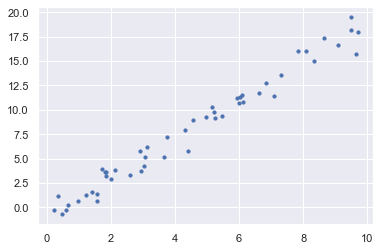

In [14]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y, s=10)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
#Создаем экземпляр класса LinearRegression и указываем с помощью
#гиперпараметра что нам хотелось бы выполнить подбор точки пересечения 
#с осью координат

In [19]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
#Делаем Х вектором-столбцом чтобы он соответствовал требования (2-у мерная матрица признаков)
#То есть формируем данные в требуемой форме
X = x[:, np.newaxis]
X.shape


(50, 1)

In [30]:
#Обучение модели на данных
#с помощью метода fit() модели

model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#все параметры модели, полученные в процессе выполнения команды fit()
#содержат в конце названия знак подчеркивания.

In [31]:
model.coef_

array([1.9776566])

In [32]:
model.intercept_

-0.9033107255311164

In [33]:
xfit = np.linspace(-1, 11)

In [34]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

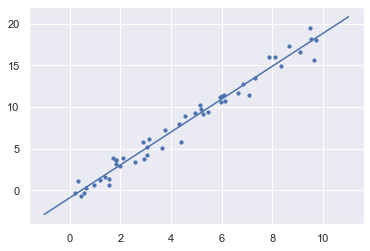

In [36]:
plt.scatter(x, y, s=10) #s - size of a markers
plt.plot(xfit, yfit)

In [38]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [39]:
from sklearn.naive_bayes import GaussianNB #1. выбираем класс модели
model = GaussianNB()                       #2. создаем экземпляр модели
model.fit(Xtrain, ytrain)                  #3. обучаем модель на данных
y_model = model.predict(Xtest)             #4. предсказываем значения 
                                           #   для новых данных
    


In [40]:
#Воспользуемся утилитой accuracy_score для выяснения 
#того какая часть предсказанных меток является истинной 

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [41]:
from sklearn.decomposition import PCA   # 1. Выбираем класс модели
model = PCA(n_components=2)   # 2. Создаем экземпляр этой модели с 
                              #.   необходимыми гиперпараметрами
model.fit(X_iris)             # 3. Обучаем модель на данных
                              #!!важно!! у мы не указываем (тк без учителя)
X_2D = model.transform(X_iris)  # 4. Преобразуем данные в двумерные

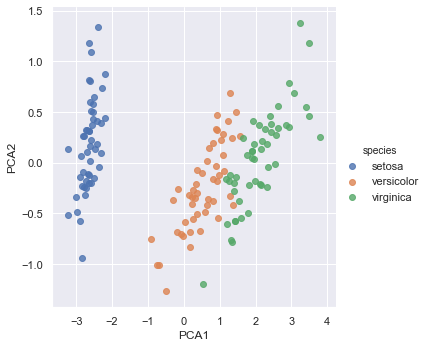

In [43]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

In [45]:
#GMM renamed to GaussianMixture
from sklearn.mixture import GaussianMixture    # 1. Выбираем класс модели
model = GaussianMixture(n_components=3, covariance_type='full')  # 2. Создаем экземпляр
                                                     # модели (число компонент = 3)
                                                     # с гиперпараметрами
model.fit(X_iris)            #3. Обучаем модель на данных. Опять таки
                             #важно!! что у мы не указываем !
y_gmm = model.predict(X_iris)    # 4. Опеределяем метки кластеров 

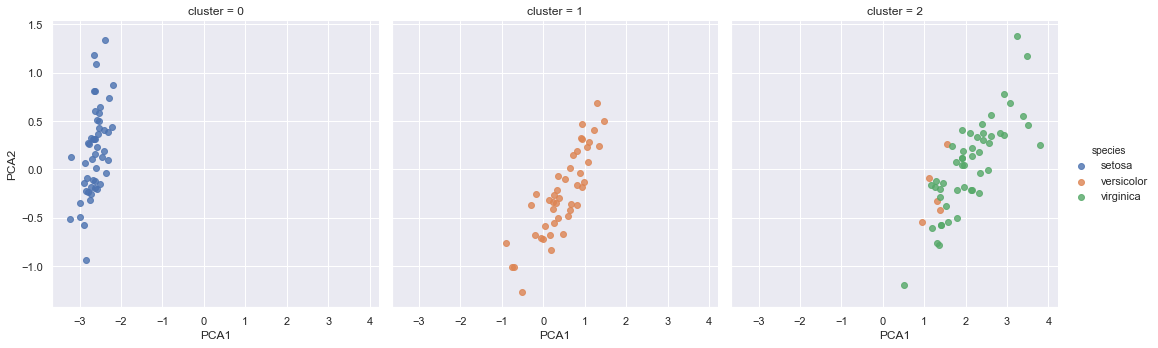

In [49]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False, height=5)